# Transfer learning traffic sign classifier

## 0. General

In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow_vgg import vgg16
from tensorflow_vgg import utils

## 1. Load data

In [7]:
#import pickle

#training_file = "train.p"
#testing_file = "test.p"

#with open(training_file, mode='rb') as f:
#    train = pickle.load(f)
#with open(testing_file, mode='rb') as f:
#    test = pickle.load(f)
    
# Combine together since we are going to create train/val/test sets after VGG looks at it
# Is that bad?

#X, y = np.append(train['features'], test['features'], axis=0), np.append(train['labels'], test['labels'])
#X_test, y_test = test['features'], test['labels']

#X = X[:2000]
#y = y[:2000]

X = np.load("X_train.npy")
y = np.load("y_train.npy")

X_test = np.load("X_test.npy")

print(X.shape, y.shape, X_test.shape)

(17424, 224, 224, 3) (17424,) (4356, 224, 224, 3)


2
Complete


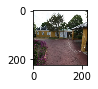

In [8]:
import random
import scipy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(1, len(X))
image = X[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y[index])
print("Complete")

#index = random.randint(1, len(X))
#image = X[index].squeeze()
#image = scipy.misc.imresize(image, [224, 224])
#plt.imshow(image)
#print(y[index])

### 1.2 Classes

In [47]:
#from pandas.io.parsers import read_csv
#classes = read_csv("signnames.csv").values[:, 1]
classes = (1, 2, 3)
print(classes)

(1, 2, 3)


### 2. Pre train with VGG

In [10]:
batch_size = 64
codes_list = []
labels = []
batch = np.empty([0, 224, 224, 3])
codes = None

In [11]:
#tf.reset_default_graph()

with tf.Session() as sess:
    
    my_vgg = vgg16.Vgg16()
    input_ = tf.placeholder(tf.float32, [None, 224, 224, 3])
    
    with tf.name_scope("content_vgg"):
        my_vgg.build(input_)
    
    len_ = len(X)
    
    for i, image in enumerate(X):

               
        image = scipy.misc.imresize(image, [224, 224])
        batch = np.append(batch, [image], axis=0)
        # print(batch.shape)
        
        labels.append(y[i])

        # Running the batch through the network to get the codes
        if i % batch_size == 0 or i == len_ - 1:

            # Get the values from the relu6 layer of the VGG network
            feed_dict = {input_ : batch}
            print(batch.shape)

            # KEY!!!!            
            codes_batch = sess.run(my_vgg.relu6, feed_dict = feed_dict)

            # Here I'm building an array of the codes
            if codes is None:
                codes = codes_batch
            else:
                codes = np.concatenate((codes, codes_batch))
                
            # Reset to start building the next batch
            batch = np.empty([0, 224, 224, 3])
            print('{:.2f} % of images processed'.format(i/len(X)*100))

C:\Users\samantha.walker\Documents\GitHub\phi-challenge\Task 1\tensorflow_vgg\vgg16.npy
npy file loaded
build model started
build model finished: 3s
(1, 224, 224, 3)


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  app.launch_new_instance()


0.00 % of images processed
(64, 224, 224, 3)
0.37 % of images processed
(64, 224, 224, 3)
0.73 % of images processed
(64, 224, 224, 3)
1.10 % of images processed
(64, 224, 224, 3)
1.47 % of images processed
(64, 224, 224, 3)
1.84 % of images processed
(64, 224, 224, 3)
2.20 % of images processed
(64, 224, 224, 3)
2.57 % of images processed
(64, 224, 224, 3)
2.94 % of images processed
(64, 224, 224, 3)
3.31 % of images processed
(64, 224, 224, 3)
3.67 % of images processed
(64, 224, 224, 3)
4.04 % of images processed
(64, 224, 224, 3)
4.41 % of images processed
(64, 224, 224, 3)
4.78 % of images processed
(64, 224, 224, 3)
5.14 % of images processed
(64, 224, 224, 3)
5.51 % of images processed
(64, 224, 224, 3)
5.88 % of images processed
(64, 224, 224, 3)
6.24 % of images processed
(64, 224, 224, 3)
6.61 % of images processed
(64, 224, 224, 3)
6.98 % of images processed
(64, 224, 224, 3)
7.35 % of images processed
(64, 224, 224, 3)
7.71 % of images processed
(64, 224, 224, 3)
8.08 % of 

65.75 % of images processed
(64, 224, 224, 3)
66.12 % of images processed
(64, 224, 224, 3)
66.48 % of images processed
(64, 224, 224, 3)
66.85 % of images processed
(64, 224, 224, 3)
67.22 % of images processed
(64, 224, 224, 3)
67.58 % of images processed
(64, 224, 224, 3)
67.95 % of images processed
(64, 224, 224, 3)
68.32 % of images processed
(64, 224, 224, 3)
68.69 % of images processed
(64, 224, 224, 3)
69.05 % of images processed
(64, 224, 224, 3)
69.42 % of images processed
(64, 224, 224, 3)
69.79 % of images processed
(64, 224, 224, 3)
70.16 % of images processed
(64, 224, 224, 3)
70.52 % of images processed
(64, 224, 224, 3)
70.89 % of images processed
(64, 224, 224, 3)
71.26 % of images processed
(64, 224, 224, 3)
71.63 % of images processed
(64, 224, 224, 3)
71.99 % of images processed
(64, 224, 224, 3)
72.36 % of images processed
(64, 224, 224, 3)
72.73 % of images processed
(64, 224, 224, 3)
73.09 % of images processed
(64, 224, 224, 3)
73.46 % of images processed
(64, 2

In [12]:
# write codes to file
with open('codes', 'w') as f:
    codes.tofile(f)  

In [13]:
print(codes.shape, y.shape)

(17424, 4096) (17424,)


### 3. Classifier

In [14]:
# read codes and labels from file
import csv

with open('codes') as f:
    codes = np.fromfile(f, dtype=np.float32)
    codes = codes.reshape((len(y), -1))

    print(codes.shape)

(17424, 4096)


###  Validation set

In [15]:
from sklearn.preprocessing import LabelBinarizer

labelBinarizer = LabelBinarizer()
labelBinarizer.fit(y)
labels_vecs = labelBinarizer.transform(y)
print(labels_vecs.shape)

(17424, 3)


In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=.2)
i, j = next( sss.split(codes, y) )
h = len(j) // 2
j, k = j[:h], j[h: ]   # Validation 50%
# end j at half of j and start k at half of j

train_x, train_y = codes[i], labels_vecs[i]
val_x, val_y = codes[j], labels_vecs[j]
test_x, test_y =  codes[k], labels_vecs[k]

In [17]:
print("Train shapes (x, y):", train_x.shape, train_y.shape)
print("Validation shapes (x, y):", val_x.shape, val_y.shape)
print("Test shapes (x, y):", test_x.shape, test_y.shape)

Train shapes (x, y): (13939, 4096) (13939, 3)
Validation shapes (x, y): (1742, 4096) (1742, 3)
Test shapes (x, y): (1743, 4096) (1743, 3)


### Batches!


In [18]:
def get_batches(x, y, n_batches=10):
    """ Return a generator that yields batches from arrays x and y. """
    batch_size = len(x)//n_batches
    
    for ii in range(0, n_batches*batch_size, batch_size):
        # If we're not on the last batch, grab data with size batch_size
        if ii != (n_batches-1)*batch_size:
            X, Y = x[ii: ii+batch_size], y[ii: ii+batch_size] 
        # On the last batch, grab the rest of the data
        else:
            X, Y = x[ii:], y[ii:]
        # I love generators
        yield X, Y

### Classifier layers

In [61]:
inputs_ = tf.placeholder(tf.float32, shape=[None, codes.shape[1]])
labels_ = tf.placeholder(tf.int64, shape=[None, 3])
#labels_ = tf.placeholder(tf.int64, shape=[None, 43])

l_1 = tf.contrib.layers.fully_connected(inputs_, 4096)

#drop_out = tf.nn.dropout(l_1, .2)

# Add tf.image.adjust_brightness etc. here
    
logits = tf.contrib.layers.fully_connected(l_1, 3, activation_fn=None)
#logits = tf.contrib.layers.fully_connected(l_1, 43, activation_fn=None)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=labels_, 
                                                        logits=logits)

cost = tf.reduce_mean( cross_entropy )

optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
#optimizer = tf.train.AdamOptimizer().minimize(cost)

# Operations for validation/test accuracy
predicted = tf.nn.softmax(logits)
correct_pred = tf.equal(tf.argmax(predicted, 1), tf.argmax(labels_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

## 4. Training

In [62]:
saver = tf.train.Saver()

In [63]:
e = 100
iteration = 0

with tf.Session() as sess:
    
    # 1. Start session
    sess.run(tf.global_variables_initializer() )
    
    # 2. Do each epoch
    for i in range(e):
        
        #3. Do each batch
        for j, k in get_batches(train_x, train_y):
            
            #4. Input data
            feed = {inputs_: j, labels_: k}
                        
            #5. Do loss
            loss, _ = sess.run([cost, optimizer], feed_dict=feed)
            
            #6. Increment counter 
            iteration += 1
            
            #7. Print results
            print("Epoch: {} / {}".format( i, e),
                 "Iteration: {}".format( iteration ),
                 "Train loss: {:.7f}".format( loss ))
            
            #8. Do Validation
            if iteration % 5 == 0:
                feed = {inputs_: val_x, labels_: val_y}
            
                val_acc = sess.run(accuracy, feed_dict=feed)
                
                print("Epoch: {} / {}".format( i, e),
                 "Iteration: {} ".format( iteration),
                 "Validation Acc: {:.5f}".format(val_acc) )
        
    saver.save(sess, "checkpoints/a.ckpt")

Epoch: 0 / 100 Iteration: 1 Train loss: 673.2949829
Epoch: 0 / 100 Iteration: 2 Train loss: 71495.2500000
Epoch: 0 / 100 Iteration: 3 Train loss: 41551.0625000
Epoch: 0 / 100 Iteration: 4 Train loss: 4348.4521484
Epoch: 0 / 100 Iteration: 5 Train loss: 3015.2753906
Epoch: 0 / 100 Iteration: 5  Validation Acc: 0.72388
Epoch: 0 / 100 Iteration: 6 Train loss: 1637.6149902
Epoch: 0 / 100 Iteration: 7 Train loss: 2212.4731445
Epoch: 0 / 100 Iteration: 8 Train loss: 2186.0981445
Epoch: 0 / 100 Iteration: 9 Train loss: 1502.5263672
Epoch: 0 / 100 Iteration: 10 Train loss: 962.5986328
Epoch: 0 / 100 Iteration: 10  Validation Acc: 0.84214
Epoch: 1 / 100 Iteration: 11 Train loss: 507.3498840
Epoch: 1 / 100 Iteration: 12 Train loss: 354.6879578
Epoch: 1 / 100 Iteration: 13 Train loss: 386.3552551
Epoch: 1 / 100 Iteration: 14 Train loss: 504.7305603
Epoch: 1 / 100 Iteration: 15 Train loss: 452.7437134
Epoch: 1 / 100 Iteration: 15  Validation Acc: 0.84960
Epoch: 1 / 100 Iteration: 16 Train loss: 34

Epoch: 13 / 100 Iteration: 132 Train loss: 0.3880489
Epoch: 13 / 100 Iteration: 133 Train loss: 0.4500267
Epoch: 13 / 100 Iteration: 134 Train loss: 0.5618399
Epoch: 13 / 100 Iteration: 135 Train loss: 0.4298193
Epoch: 13 / 100 Iteration: 135  Validation Acc: 0.85534
Epoch: 13 / 100 Iteration: 136 Train loss: 0.4314285
Epoch: 13 / 100 Iteration: 137 Train loss: 0.5514206
Epoch: 13 / 100 Iteration: 138 Train loss: 0.5005362
Epoch: 13 / 100 Iteration: 139 Train loss: 0.4469953
Epoch: 13 / 100 Iteration: 140 Train loss: 0.4649315
Epoch: 13 / 100 Iteration: 140  Validation Acc: 0.85706
Epoch: 14 / 100 Iteration: 141 Train loss: 0.4254276
Epoch: 14 / 100 Iteration: 142 Train loss: 0.3706793
Epoch: 14 / 100 Iteration: 143 Train loss: 0.4341453
Epoch: 14 / 100 Iteration: 144 Train loss: 0.5418442
Epoch: 14 / 100 Iteration: 145 Train loss: 0.4116093
Epoch: 14 / 100 Iteration: 145  Validation Acc: 0.85649
Epoch: 14 / 100 Iteration: 146 Train loss: 0.4161032
Epoch: 14 / 100 Iteration: 147 Train 

Epoch: 25 / 100 Iteration: 260  Validation Acc: 0.86567
Epoch: 26 / 100 Iteration: 261 Train loss: 0.3101332
Epoch: 26 / 100 Iteration: 262 Train loss: 0.3028289
Epoch: 26 / 100 Iteration: 263 Train loss: 0.3106119
Epoch: 26 / 100 Iteration: 264 Train loss: 0.3738706
Epoch: 26 / 100 Iteration: 265 Train loss: 0.3122168
Epoch: 26 / 100 Iteration: 265  Validation Acc: 0.86567
Epoch: 26 / 100 Iteration: 266 Train loss: 0.3103780
Epoch: 26 / 100 Iteration: 267 Train loss: 0.3550613
Epoch: 26 / 100 Iteration: 268 Train loss: 0.3437668
Epoch: 26 / 100 Iteration: 269 Train loss: 0.3251697
Epoch: 26 / 100 Iteration: 270 Train loss: 0.3110861
Epoch: 26 / 100 Iteration: 270  Validation Acc: 0.86682
Epoch: 27 / 100 Iteration: 271 Train loss: 0.3054905
Epoch: 27 / 100 Iteration: 272 Train loss: 0.2994003
Epoch: 27 / 100 Iteration: 273 Train loss: 0.3029579
Epoch: 27 / 100 Iteration: 274 Train loss: 0.3616625
Epoch: 27 / 100 Iteration: 275 Train loss: 0.3076758
Epoch: 27 / 100 Iteration: 275  Valid

Epoch: 38 / 100 Iteration: 389 Train loss: 0.2772575
Epoch: 38 / 100 Iteration: 390 Train loss: 0.2658223
Epoch: 38 / 100 Iteration: 390  Validation Acc: 0.87256
Epoch: 39 / 100 Iteration: 391 Train loss: 0.2560926
Epoch: 39 / 100 Iteration: 392 Train loss: 0.2633030
Epoch: 39 / 100 Iteration: 393 Train loss: 0.2590921
Epoch: 39 / 100 Iteration: 394 Train loss: 0.2732431
Epoch: 39 / 100 Iteration: 395 Train loss: 0.2671099
Epoch: 39 / 100 Iteration: 395  Validation Acc: 0.87199
Epoch: 39 / 100 Iteration: 396 Train loss: 0.2584176
Epoch: 39 / 100 Iteration: 397 Train loss: 0.2769241
Epoch: 39 / 100 Iteration: 398 Train loss: 0.2811172
Epoch: 39 / 100 Iteration: 399 Train loss: 0.2740524
Epoch: 39 / 100 Iteration: 400 Train loss: 0.2616659
Epoch: 39 / 100 Iteration: 400  Validation Acc: 0.87256
Epoch: 40 / 100 Iteration: 401 Train loss: 0.2528881
Epoch: 40 / 100 Iteration: 402 Train loss: 0.2608254
Epoch: 40 / 100 Iteration: 403 Train loss: 0.2568700
Epoch: 40 / 100 Iteration: 404 Train 

Epoch: 51 / 100 Iteration: 517 Train loss: 0.2524802
Epoch: 51 / 100 Iteration: 518 Train loss: 0.2352331
Epoch: 51 / 100 Iteration: 519 Train loss: 0.2414869
Epoch: 51 / 100 Iteration: 520 Train loss: 0.2307328
Epoch: 51 / 100 Iteration: 520  Validation Acc: 0.87773
Epoch: 52 / 100 Iteration: 521 Train loss: 0.2279518
Epoch: 52 / 100 Iteration: 522 Train loss: 0.2327964
Epoch: 52 / 100 Iteration: 523 Train loss: 0.2297357
Epoch: 52 / 100 Iteration: 524 Train loss: 0.2452152
Epoch: 52 / 100 Iteration: 525 Train loss: 0.2388721
Epoch: 52 / 100 Iteration: 525  Validation Acc: 0.87830
Epoch: 52 / 100 Iteration: 526 Train loss: 0.2289415
Epoch: 52 / 100 Iteration: 527 Train loss: 0.2505842
Epoch: 52 / 100 Iteration: 528 Train loss: 0.2318034
Epoch: 52 / 100 Iteration: 529 Train loss: 0.2391523
Epoch: 52 / 100 Iteration: 530 Train loss: 0.2279736
Epoch: 52 / 100 Iteration: 530  Validation Acc: 0.87830
Epoch: 53 / 100 Iteration: 531 Train loss: 0.2261534
Epoch: 53 / 100 Iteration: 532 Train 

Epoch: 64 / 100 Iteration: 645  Validation Acc: 0.88576
Epoch: 64 / 100 Iteration: 646 Train loss: 0.2064204
Epoch: 64 / 100 Iteration: 647 Train loss: 0.2309164
Epoch: 64 / 100 Iteration: 648 Train loss: 0.2018663
Epoch: 64 / 100 Iteration: 649 Train loss: 0.2137347
Epoch: 64 / 100 Iteration: 650 Train loss: 0.2044753
Epoch: 64 / 100 Iteration: 650  Validation Acc: 0.88519
Epoch: 65 / 100 Iteration: 651 Train loss: 0.2014109
Epoch: 65 / 100 Iteration: 652 Train loss: 0.2100371
Epoch: 65 / 100 Iteration: 653 Train loss: 0.2039356
Epoch: 65 / 100 Iteration: 654 Train loss: 0.2226466
Epoch: 65 / 100 Iteration: 655 Train loss: 0.2135493
Epoch: 65 / 100 Iteration: 655  Validation Acc: 0.88691
Epoch: 65 / 100 Iteration: 656 Train loss: 0.2054091
Epoch: 65 / 100 Iteration: 657 Train loss: 0.2284777
Epoch: 65 / 100 Iteration: 658 Train loss: 0.2004089
Epoch: 65 / 100 Iteration: 659 Train loss: 0.2118368
Epoch: 65 / 100 Iteration: 660 Train loss: 0.2027658
Epoch: 65 / 100 Iteration: 660  Valid

Epoch: 77 / 100 Iteration: 774 Train loss: 0.1967498
Epoch: 77 / 100 Iteration: 775 Train loss: 0.1957180
Epoch: 77 / 100 Iteration: 775  Validation Acc: 0.88806
Epoch: 77 / 100 Iteration: 776 Train loss: 0.1876812
Epoch: 77 / 100 Iteration: 777 Train loss: 0.2100495
Epoch: 77 / 100 Iteration: 778 Train loss: 0.1813436
Epoch: 77 / 100 Iteration: 779 Train loss: 0.1910855
Epoch: 77 / 100 Iteration: 780 Train loss: 0.1778750
Epoch: 77 / 100 Iteration: 780  Validation Acc: 0.88921
Epoch: 78 / 100 Iteration: 781 Train loss: 0.1792333
Epoch: 78 / 100 Iteration: 782 Train loss: 0.1879363
Epoch: 78 / 100 Iteration: 783 Train loss: 0.1888254
Epoch: 78 / 100 Iteration: 784 Train loss: 0.1954233
Epoch: 78 / 100 Iteration: 785 Train loss: 0.1947056
Epoch: 78 / 100 Iteration: 785  Validation Acc: 0.88749
Epoch: 78 / 100 Iteration: 786 Train loss: 0.1854466
Epoch: 78 / 100 Iteration: 787 Train loss: 0.2081192
Epoch: 78 / 100 Iteration: 788 Train loss: 0.1801925
Epoch: 78 / 100 Iteration: 789 Train 

Epoch: 90 / 100 Iteration: 902 Train loss: 0.1742480
Epoch: 90 / 100 Iteration: 903 Train loss: 0.1776576
Epoch: 90 / 100 Iteration: 904 Train loss: 0.1842883
Epoch: 90 / 100 Iteration: 905 Train loss: 0.1800391
Epoch: 90 / 100 Iteration: 905  Validation Acc: 0.89208
Epoch: 90 / 100 Iteration: 906 Train loss: 0.1708356
Epoch: 90 / 100 Iteration: 907 Train loss: 0.1932790
Epoch: 90 / 100 Iteration: 908 Train loss: 0.1675968
Epoch: 90 / 100 Iteration: 909 Train loss: 0.1735626
Epoch: 90 / 100 Iteration: 910 Train loss: 0.1597808
Epoch: 90 / 100 Iteration: 910  Validation Acc: 0.89323
Epoch: 91 / 100 Iteration: 911 Train loss: 0.1625241
Epoch: 91 / 100 Iteration: 912 Train loss: 0.1740981
Epoch: 91 / 100 Iteration: 913 Train loss: 0.1773108
Epoch: 91 / 100 Iteration: 914 Train loss: 0.1830203
Epoch: 91 / 100 Iteration: 915 Train loss: 0.1789081
Epoch: 91 / 100 Iteration: 915  Validation Acc: 0.89150
Epoch: 91 / 100 Iteration: 916 Train loss: 0.1694999
Epoch: 91 / 100 Iteration: 917 Train 

### Testing

Below you see the test accuracy. You can also see the predictions returned for images.

In [64]:
# 94% with 100 - 200 epochs  no other changes

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    feed = {inputs_: test_x,
            labels_: test_y}
    test_acc = sess.run(accuracy, feed_dict=feed)
    print("Test accuracy: {:.4f}".format(test_acc))

INFO:tensorflow:Restoring parameters from checkpoints\a.ckpt
Test accuracy: 0.8795


In [65]:
# 89% with 300 epochs dropout

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    feed = {inputs_: test_x,
            labels_: test_y}
    test_acc = sess.run(accuracy, feed_dict=feed)
    print("Test accuracy: {:.4f}".format(test_acc))

INFO:tensorflow:Restoring parameters from checkpoints\a.ckpt
Test accuracy: 0.8795


In [39]:
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.ndimage import imread

In [40]:
# Run this cell if you don't have a vgg graph built
if 'my_vgg' in globals():
    print('"vgg" object already exists.  Will not create again.')
else:
    #create vgg
    with tf.Session() as sess:
        input_ = tf.placeholder(tf.float32, [None, 224, 224, 3])
        vgg = vgg16.Vgg16()
        vgg.build(input_)

"vgg" object already exists.  Will not create again.


In [41]:
#test_img_path = 'flower_photos/daisy/5547758_eea9edfd54_n.jpg'
#test_img = imread(test_img_path)
#plt.imshow(test_img)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


INFO:tensorflow:Restoring parameters from checkpoints\a.ckpt


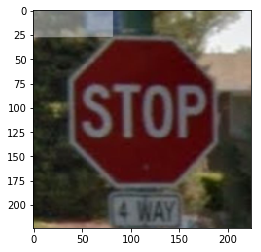

In [43]:
with tf.Session() as sess:
    #image = X[2000]
    
    #plt.imshow(image)
    
    image = scipy.misc.imread('extra-images/' + "1.jpg")
    
    image = scipy.misc.imresize(image, [224, 224])
    
    plt.imshow(image)
    
    image = image.reshape((1, 224, 224, 3))


    feed_dict = {input_: image}
    
    ## KEY
    code = sess.run(my_vgg.relu6, feed_dict=feed_dict)
        
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    feed = {inputs_: code}
    prediction = sess.run(predicted, feed_dict=feed).squeeze()
    
    top5 = sess.run(tf.nn.top_k(tf.constant(prediction), k=3, sorted=True))
    
    # print(prediction)

In [48]:
print(top5)
print(max(prediction))

for i in range(3):
    print(classes[top5.indices[i]])

TopKV2(values=array([1.0000000e+00, 5.5176347e-10, 2.4282676e-27], dtype=float32), indices=array([1, 0, 2]))
1.0
2
1
3


In [49]:
#print(max(prediction))

chart_i = [i for i in classes[top5.indices]]
chart_v = [i for i in top5.values]
print(chart_v)

plt.barh(np.arange(3), chart_v)

_ = plt.yticks(np.arange(3), chart_i)

TypeError: only integer scalar arrays can be converted to a scalar index